### Loading do Arquivo

### Trabalho do Semestre
- Utilizar dados de 1 doença só
- Plottar gráficos por estado
- Doenças 

In [37]:
! pip install openpyxl

5175.16s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Defaulting to user installation because normal site-packages is not writeable


In [1]:
# Mapeamento de doenças (índice - nome)
dict_doencas = {"V0001" : "Unidade Federativa",
                "Q00201" : "Pressao Alta", 
                "C008" : "Idade Atual",
                "Q003" : "Idade Diagnostico PA"}

#Converte o dicionário em uma lista de doenças
doencas_list = list(dict_doencas.items())
print(doencas_list)

[('V0001', 'Unidade Federativa'), ('Q00201', 'Pressao Alta'), ('C008', 'Idade Atual'), ('Q003', 'Idade Diagnostico PA')]


In [39]:
import pandas as pd
import matplotlib.pyplot as plt

#Carrega o dataset utilizando apenas as colunas citadas
columns = ["V0001", "Q00201", "Q079", "C008", "Q003", "Q080"]
df = pd.read_csv("./pns2019.csv", usecols=columns)
print(df.head())

#Constrói um dataframe usando as doenças como índices
#TODO: tá bugando, corrigir.
df_saida = pd.DataFrame(doencas_list, columns=["Indice", "Doenca"])
print(df_saida)

   V0001  C008  Q00201  Q003  Q079  Q080
0     11  55.0     1.0  46.0   1.0  45.0
1     11  69.0     NaN   NaN   NaN   NaN
2     11  31.0     NaN   NaN   NaN   NaN
3     11   9.0     NaN   NaN   NaN   NaN
4     11   6.0     NaN   NaN   NaN   NaN
   Indice                     Doenca
0   V0001         Unidade Federativa
1  Q00201               Pressao Alta
2    Q079                    Artrite
3    C008                Idade Atual
4    Q003       Idade Diagnostico PA
5    Q080  Idade Diagnostico Artrite


In [40]:
#Mapeia os códigos das doenças para os nomes
mapping = dict(zip(df_saida['Indice'], df_saida['Doenca']))
#print(mapping)

#Renomeia as colunas do dataframe
df_pa_artrite = df.rename(columns=mapping)
print(df)

        V0001  C008  Q00201  Q003  Q079  Q080
0          11  55.0     1.0  46.0   1.0  45.0
1          11  69.0     NaN   NaN   NaN   NaN
2          11  31.0     NaN   NaN   NaN   NaN
3          11   9.0     NaN   NaN   NaN   NaN
4          11   6.0     NaN   NaN   NaN   NaN
...       ...   ...     ...   ...   ...   ...
293721     53  49.0     NaN   NaN   NaN   NaN
293722     53  84.0     NaN   NaN   NaN   NaN
293723     53  21.0     NaN   NaN   NaN   NaN
293724     53  13.0     NaN   NaN   NaN   NaN
293725     53   NaN     NaN   NaN   NaN   NaN

[293726 rows x 6 columns]


### Pressão Alta + Artrite
- Parte do Cláudio Augusto Novaes Gontijo
- Filtrando

In [41]:
# Filtrar pessoas com pressão alta e cataratas
df_pa_artrite_corr = df_pa_artrite[(df_pa_artrite["Pressao Alta"] == 1) & (df_pa_artrite["Artrite"] == 1)]

/tmp/ipykernel_1282/2870673187.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pa_artrite_corr['Unidade Federativa'] = df_pa_artrite_corr['Unidade Federativa'].map(estado_dict)


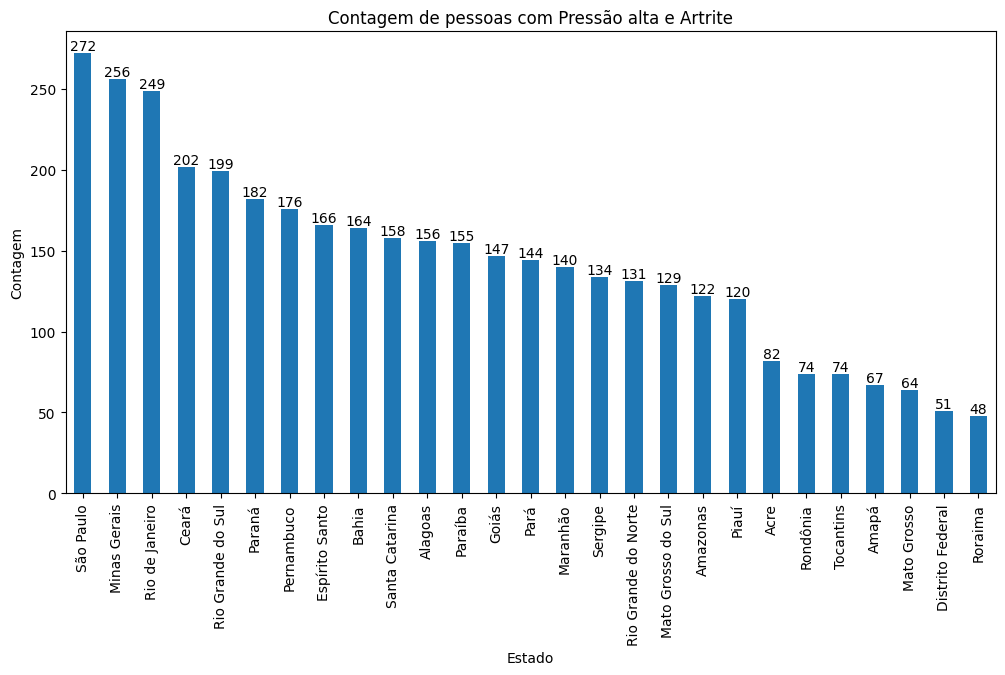

In [42]:
estado_dict = {
    11: 'Rondônia', 
    12: 'Acre', 
    13: 'Amazonas', 
    14: 'Roraima', 
    15: 'Pará', 
    16: 'Amapá', 
    17: 'Tocantins',
    21: 'Maranhão', 
    22: 'Piauí', 
    23: 'Ceará', 
    24: 'Rio Grande do Norte', 
    25: 'Paraíba', 
    26: 'Pernambuco', 
    27: 'Alagoas', 
    28: 'Sergipe', 
    29: 'Bahia',
    31: 'Minas Gerais', 
    32: 'Espírito Santo', 
    33: 'Rio de Janeiro', 
    35: 'São Paulo',
    41: 'Paraná', 
    42: 'Santa Catarina', 
    43: 'Rio Grande do Sul',
    50: 'Mato Grosso do Sul', 
    51: 'Mato Grosso', 
    52: 'Goiás', 
    53: 'Distrito Federal'
}

df_pa_artrite_corr['Unidade Federativa'] = df_pa_artrite_corr['Unidade Federativa'].map(estado_dict)
contagem_por_estado = df_pa_artrite_corr['Unidade Federativa'].value_counts()

plt.figure(figsize=(12, 6))
ax = contagem_por_estado.plot(kind='bar')

plt.title('Contagem de pessoas com Pressão alta e Artrite')
plt.xlabel('Estado')
plt.ylabel('Contagem')

# Todo, entender essa parte do código
for i in ax.containers:
    ax.bar_label(i, label_type='edge')

plt.show()

## Análise de Correlação de Features

### **Correlação entre Pressão Alta e Artrite:**
1. **Inflamação Crônica:** A artrite, especialmente a artrite reumatoide, é uma doença inflamatória crônica. A inflamação prolongada pode danificar os vasos sanguíneos e aumentar a pressão arterial.
2. **Medicamentos:** Alguns medicamentos usados para tratar artrite, como corticosteroides, podem aumentar a pressão arterial.
3. **Estilo de Vida:** Fatores de estilo de vida associados a ambas as condições (como sedentarismo e dieta inadequada) também podem contribuir para a coexistência de pressão alta e artrite.

**Pressão Alta (Hipertensão):**

1. **Causas e Fatores de Risco:**
   - **Genética:** História familiar de hipertensão.
   - **Estilo de Vida:** Dieta rica em sódio, obesidade, sedentarismo, consumo excessivo de álcool.
   - **Idade e Sexo:** Homens tendem a desenvolver hipertensão mais cedo; a prevalência aumenta em ambos os sexos com a idade.
   - **Condições Médicas:** Diabetes, doenças renais crônicas, apneia do sono.

2. **Complicações:**
   - **Doenças Cardiovasculares:** Infarto, insuficiência cardíaca.
   - **Doenças Renais:** Insuficiência renal crônica.
   - **Problemas de Visão:** Retinopatia hipertensiva.
   - **Acidente Vascular Cerebral (AVC).**

3. **Atributos Relevantes para Pesquisa:**
   - Idade, sexo, índice de massa corporal (IMC), níveis de atividade física, consumo de sal e álcool, níveis de glicose no sangue, histórico familiar de hipertensão, função renal (creatinina), níveis de colesterol (LDL, HDL).

**Artrite:**

1. **Tipos Principais:**
   - **Osteoartrite:** Desgaste das cartilagens, geralmente relacionada ao envelhecimento ou uso excessivo de articulações.
   - **Artrite Reumatoide:** Doença autoimune que causa inflamação crônica nas articulações.
   - **Artrite Psoriática:** Relacionada à psoríase, com inflamação nas articulações.

2. **Fatores de Risco e Causas:**
   - **Genética:** Predisposição genética para artrite reumatoide e psoriática.
   - **Idade e Sexo:** Maior prevalência em mulheres e em idosos.
   - **Infecções:** Certas infecções podem desencadear artrite reativa.
   - **Estilo de Vida:** Obesidade e falta de atividade física aumentam o risco de osteoartrite.

3. **Complicações:**
   - **Mobilidade Reduzida:** Impacta a qualidade de vida e pode levar ao sedentarismo.
   - **Problemas Cardiovasculares:** Pacientes com artrite reumatoide têm risco aumentado de doenças cardíacas.
   - **Osteoporose:** Perda de densidade óssea em pacientes com artrite.

4. **Atributos Relevantes para Pesquisa:**
   - Tipo de artrite, idade, sexo, IMC, níveis de atividade física, marcadores inflamatórios (PCR, VSG), presença de autoanticorpos (Fator Reumatoide, Anti-CCP), histórico familiar, presença de comorbidades (como diabetes e hipertensão).

**Correlação entre Pressão Alta e Artrite:**

1. **Mecanismos de Interação:**
   - **Inflamação Crônica:** A artrite reumatoide causa inflamação crônica, que pode afetar os vasos sanguíneos, aumentando o risco de hipertensão.
   - **Medicamentos Anti-inflamatórios:** Medicamentos como corticosteroides, usados para tratar a inflamação na artrite, podem aumentar a pressão arterial.
   - **Estilo de Vida Compartilhado:** Fatores de risco comuns como obesidade, sedentarismo e má alimentação são comuns a ambas as condições.

2. **Impacto de Comorbidades:**
   - Pacientes com ambas as condições têm um risco aumentado de complicações cardiovasculares, o que sugere a necessidade de um manejo multidisciplinar.

3. **Atributos Relevantes para Pesquisa da Correlação:**
   - Presença de artrite (tipo específico), pressão arterial (sistólica e diastólica), níveis de inflamação (PCR, VSG), uso de medicamentos anti-inflamatórios e antihipertensivos, função renal, idade, sexo, IMC, glicemia, perfil lipídico.

**Artigos Relevantes para a Correlação:**

1. **"Inflammation and Hypertension: A Pathophysiological Link"** - Explora como inflamações crônicas, como as vistas na artrite reumatoide, podem contribuir para o desenvolvimento de hipertensão.
2. **"Hypertension and Rheumatoid Arthritis: Epidemiological and Mechanistic Perspectives"** - Discute a coexistência de hipertensão e artrite reumatoide, abordando fatores de risco comuns e possíveis mecanismos patológicos.
3. **"Comorbidities in Rheumatoid Arthritis: Hypertension as a Major Risk Factor"** - Análise sobre a alta prevalência de hipertensão entre pacientes com artrite reumatoide e suas implicações clínicas.

Esses artigos estão disponíveis em repositórios como PubMed, SpringerLink, e Elsevier. Eles fornecem uma visão abrangente sobre as interações entre artrite e hipertensão e podem guiar na seleção de atributos relevantes para análises de dados.

**Fatores Sociais que Podem Afetar Pressão Alta e Artrite:**

1. **Status Socioeconômico:**
   - **Baixa Renda e Pobreza:** Acesso limitado a alimentos saudáveis, cuidados médicos e medicamentos adequados. Pessoas de baixa renda podem ter mais dificuldade em manter uma dieta saudável e controlar o peso, fatores que influenciam tanto a hipertensão quanto a artrite.
   - **Educação:** Menor nível de educação está associado a um menor conhecimento sobre prevenção de doenças, adesão a tratamentos e práticas de saúde, aumentando o risco de ambas as condições.

2. **Ambiente de Trabalho:**
   - **Trabalho Sedentário:** Trabalhos que exigem longas horas sentado sem movimento adequado podem contribuir para obesidade, hipertensão e artrite, especialmente osteoartrite.
   - **Trabalho Estressante:** Altos níveis de estresse no trabalho podem aumentar a pressão arterial devido ao aumento da produção de hormônios como o cortisol. O estresse também pode agravar os sintomas de artrite reumatoide e outras doenças inflamatórias.

3. **Acesso aos Cuidados de Saúde:**
   - **Barreiras ao Acesso:** Difícil acesso a cuidados médicos de qualidade pode atrasar o diagnóstico e o tratamento tanto da hipertensão quanto da artrite, agravando os quadros clínicos.
   - **Disparidades na Assistência:** Diferenças na qualidade dos cuidados de saúde disponíveis para diferentes grupos sociais e raciais podem afetar a gestão das doenças.

4. **Habitação e Condições de Vida:**
   - **Ambientes Urbanos:** Exposição a ambientes poluídos, falta de espaços verdes para exercícios e altos níveis de estresse urbano podem contribuir para a hipertensão e exacerbar os sintomas de artrite.
   - **Condições de Moradia:** Moradias inadequadas podem contribuir para níveis elevados de estresse, piora do sono e aumento da exposição a patógenos que poderiam desencadear condições inflamatórias como a artrite.

5. **Rede de Apoio Social:**
   - **Suporte Familiar e Comunitário:** Uma rede de apoio social forte pode ajudar na adesão a tratamentos e na manutenção de um estilo de vida saudável, enquanto o isolamento social pode agravar as condições de saúde.
   - **Apoio Emocional:** Pacientes com bom suporte emocional têm melhores resultados na gestão de doenças crônicas, reduzindo o impacto de sintomas e complicações.

6. **Estilo de Vida e Cultura:**
   - **Dieta e Hábitos Alimentares:** Culturas com dietas ricas em sódio e gorduras aumentam o risco de hipertensão. Dietas inadequadas podem também piorar a artrite.
   - **Níveis de Atividade Física:** Sociedades que incentivam atividades físicas ao ar livre tendem a ter menores taxas de hipertensão e artrite. A falta de incentivo para exercícios físicos contribui para a obesidade, um fator de risco para ambas as condições.

7. **Influência Cultural e Normas Sociais:**
   - **Percepções de Saúde:** Em algumas culturas, a hipertensão pode não ser percebida como uma condição séria até que os sintomas se tornem severos. Da mesma forma, a dor nas articulações pode ser subestimada até que a mobilidade seja significativamente afetada.

Esses fatores sociais mostram a complexidade de abordar a saúde de uma forma holística, onde o ambiente e o contexto social desempenham papéis significativos na prevalência e na gestão de doenças como hipertensão e artrite.

Os fatores sociais mais importantes que afetam tanto a hipertensão quanto a artrite são:

1. **Status Socioeconômico:**
   - **Baixa Renda e Pobreza:** Limita o acesso a alimentos saudáveis, cuidados médicos e medicamentos adequados. A falta de recursos financeiros impacta a capacidade de manter uma dieta balanceada, acessar tratamento precoce e aderir a regimes terapêuticos.
   - **Educação:** Influencia o nível de conhecimento sobre prevenção de doenças e adesão ao tratamento. Menor nível educacional pode levar a práticas de saúde inadequadas.

2. **Estilo de Vida e Cultura:**
   - **Dieta e Hábitos Alimentares:** Dietas ricas em sódio e gorduras aumentam o risco de hipertensão; dietas inadequadas podem piorar os sintomas de artrite. A cultura alimentar tem um grande impacto na prevalência dessas doenças.
   - **Níveis de Atividade Física:** O sedentarismo é um fator de risco comum para ambas as doenças. A atividade física regular ajuda no controle do peso, melhora a circulação sanguínea e reduz a inflamação.

3. **Acesso aos Cuidados de Saúde:**
   - **Barreiras ao Acesso:** Difícil acesso a serviços de saúde de qualidade pode atrasar o diagnóstico e o tratamento, agravando ambas as condições.
   - **Desigualdades na Assistência:** Diferenças no acesso a cuidados de saúde entre diferentes grupos sociais e raciais podem afetar significativamente o manejo e o prognóstico dessas doenças.

4. **Rede de Apoio Social:**
   - **Suporte Familiar e Comunitário:** Influencia positivamente a adesão ao tratamento e o manejo da doença. Pacientes com suporte social adequado têm melhores resultados de saúde.

Esses fatores são cruciais porque impactam diretamente a prevenção, o diagnóstico precoce, o tratamento e o manejo das doenças crônicas, como a hipertensão e a artrite.

### Análise de Idade de Diagnóstico de Pressão Alta e Artrite
- Simples (a primeira doença diagnosticada) + (a segunda doença diagnosticada), separadamente.
- Composto (a segunda doença diagnosticada), ou seja, já tinha a primeira, adquiriu a segunda.

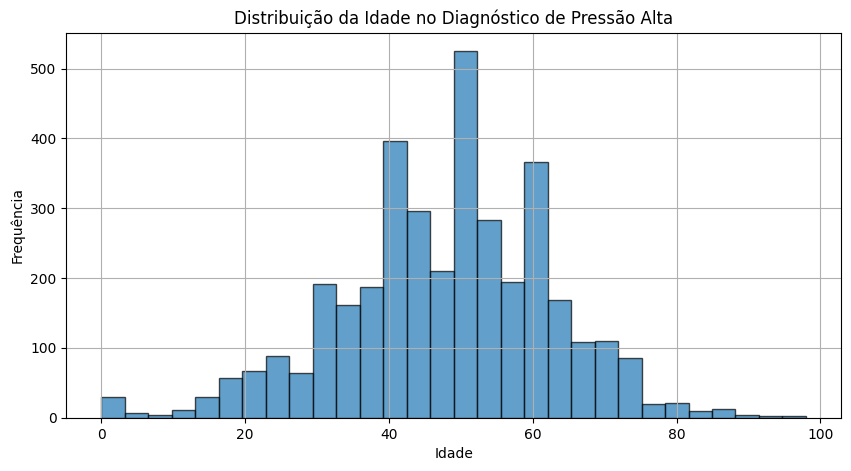

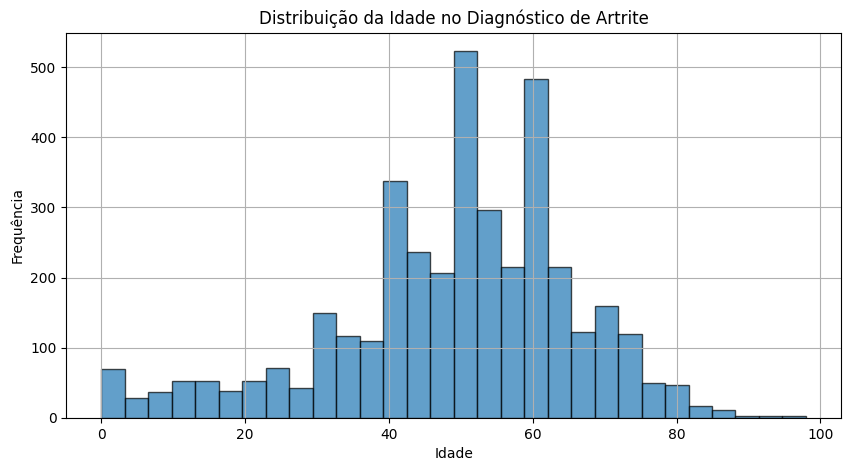

In [43]:
import matplotlib.pyplot as plt

# Mapeamento de doenças (índice - nome)
dict_doencas = {"V0001" : "Unidade Federativa",
                "Q00201" : "Pressao Alta", 
                "Q079" : "Artrite",
                "C008" : "Idade Atual",
                "Q003" : "Idade Diagnostico PA",
                "Q080" : "Idade Diagnostico Artrite"}

# df_pa_artrite_corr -> dataframe com pessoas que possuem pressão alta e artrite simultaneamente
# Gera o gráfico para "Idade Diagnostico PA"
plt.figure(figsize=(10, 5))
plt.hist(df_pa_artrite_corr["Idade Diagnostico PA"], bins=30, edgecolor='k', alpha=0.7)
plt.title("Distribuição da Idade no Diagnóstico de Pressão Alta")
plt.xlabel("Idade")
plt.ylabel("Frequência")
plt.grid(True)
plt.show()

# Gera o gráfico para "Idade Diagnostico Artrite"
plt.figure(figsize=(10, 5))
plt.hist(df_pa_artrite_corr["Idade Diagnostico Artrite"], bins=30, edgecolor='k', alpha=0.7)
plt.title("Distribuição da Idade no Diagnóstico de Artrite")
plt.xlabel("Idade")
plt.ylabel("Frequência")
plt.grid(True)
plt.show()

### Plottando as simultaneas

/tmp/ipykernel_1282/2531937430.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pa_artrite_corr["Idade Primeira Vez"] = df_pa_artrite_corr[["Idade Diagnostico PA", "Idade Diagnostico Artrite"]].max(axis=1)


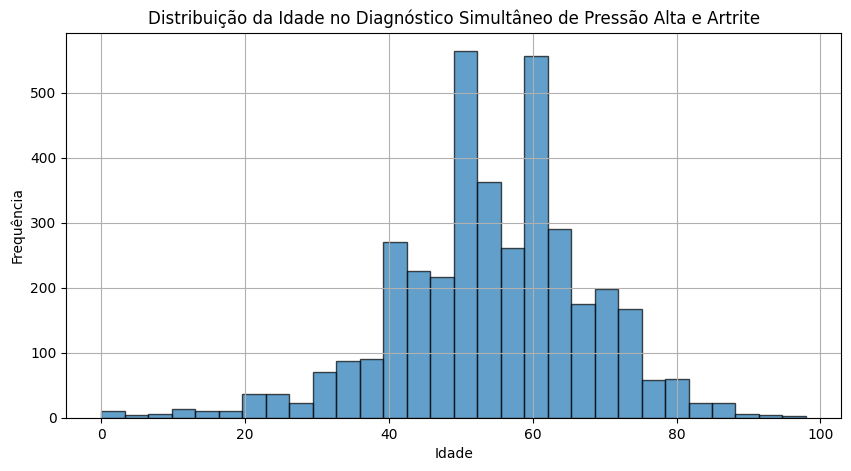

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Mapeamento de doenças (índice - nome)
dict_doencas = {"V0001" : "Unidade Federativa",
                "Q00201" : "Pressao Alta", 
                "Q079" : "Artrite",
                "C008" : "Idade Atual",
                "Q003" : "Idade Diagnostico PA",
                "Q080" : "Idade Diagnostico Artrite"}

# Calcula a idade em que a pessoa possuía os dois diagnósticos simultaneamente pela primeira vez, o máximo é a maior idade
df_pa_artrite_corr["Idade Primeira Vez"] = df_pa_artrite_corr[["Idade Diagnostico PA", "Idade Diagnostico Artrite"]].max(axis=1)

# Gera o gráfico para "Idade Primeira Vez"
plt.figure(figsize=(10, 5))
plt.hist(df_pa_artrite_corr["Idade Primeira Vez"].dropna(), bins=30, edgecolor='k', alpha=0.7)
plt.title("Distribuição da Idade no Diagnóstico Simultâneo de Pressão Alta e Artrite")
plt.xlabel("Idade")
plt.ylabel("Frequência")
plt.grid(True)
plt.show()

### Simultaneamente por Estado e por Idade

/tmp/ipykernel_1282/123283869.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pa_artrite_corr["Idade Primeira Vez"] = df_pa_artrite_corr[["Idade Diagnostico PA", "Idade Diagnostico Artrite"]].max(axis=1)


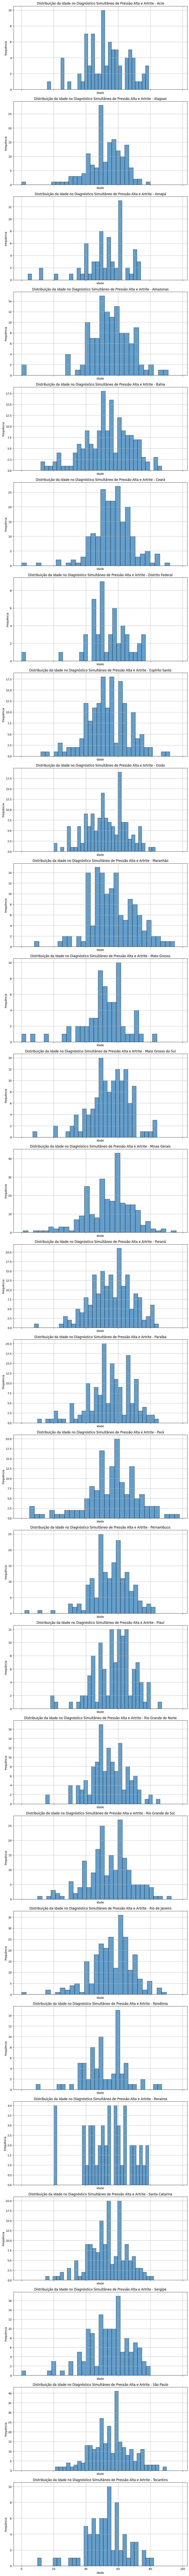

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Mapeamento de doenças (índice - nome)
dict_doencas = {
    "V0001": "Unidade Federativa",
    "Q00201": "Pressao Alta",
    "Q079": "Artrite",
    "C008": "Idade Atual",
    "Q003": "Idade Diagnostico PA",
    "Q080": "Idade Diagnostico Artrite"
}

# Calcula a idade em que a pessoa possuía os dois diagnósticos simultaneamente pela primeira vez
df_pa_artrite_corr["Idade Primeira Vez"] = df_pa_artrite_corr[["Idade Diagnostico PA", "Idade Diagnostico Artrite"]].max(axis=1)

# Agrupa os dados por estado
grouped = df_pa_artrite_corr.groupby("Unidade Federativa")

# Plota histogramas para cada estado
num_states = len(grouped)
fig, axes = plt.subplots(num_states, 1, figsize=(10, 5 * num_states), sharex=True)

for (state, data), ax in zip(grouped, axes):
    ax.hist(data["Idade Primeira Vez"].dropna(), bins=30, edgecolor='k', alpha=0.7)
    ax.set_title(f"Distribuição da Idade no Diagnóstico Simultâneo de Pressão Alta e Artrite - {state}")
    ax.set_xlabel("Idade")
    ax.set_ylabel("Frequência")
    ax.grid(True)

plt.tight_layout()
plt.show()